# Visual Q&A Demo

## Setup
1-Adds required packages to Julia.   
2-Downloads sample data and a pretrained model. 

In [13]:
include("demosetup.jl")
include("src/macnet.jl")

scalepixel (generic function with 1 method)

## Initialization
1-Loads the sample demo data (image features,questions,vocabulary).   
2-Loads the pretrained model.   

In [14]:
feats,qstsns,(w2i,a2i,i2w,i2a) = loadDemoData("data/demo/");
_,wrun,r,_,o = loadmodel("models/macnet.jld";onlywrun=true);
#if !(typeof(first(wrun)) <: atype)
#    wrun = map(atype,wrun);
#end;

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


## Sample Data
1-Randomly selects (question,image) pair from the sample data   
2-Make predictions for the question and checks whether the prediction is correct   

In [15]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = atype(feats[:,:,:,rnd:rnd])
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
answer==prediction

true

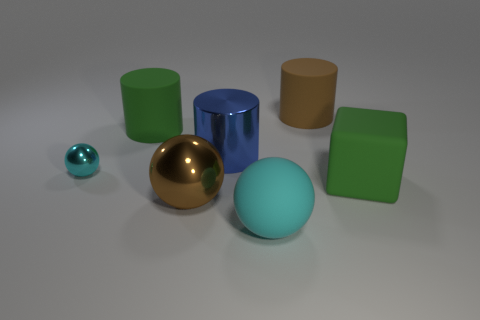

In [16]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [20]:
textq  = i2w[question];
println("Question: ",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question: The large rubber sphere is what color ?
Answer: cyan
Prediction: cyan 


## User Data
You can enter your own question about the image and test whether the prediction is correct

In [21]:
userinput = readline(STDIN)
words = split(userinput) # tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=o[:p],selfattn=o[:selfattn],gating=o[:gating]);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> how many object are there ?
Question: how many object are there ?
Prediction: 7


## Visualize
`visualize` function visualizes attention maps for each time step of the mac network

Top-3 Attended Words:
("are", "27.35%")
("there", "26.37%")
("?", "24.78%")
Image Attention Map: 

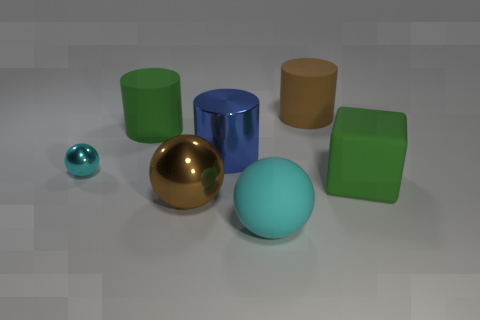

Top-3 Attended Words:
("many", "62.43%")
("object", "13.90%")
("how", "13.16%")
Image Attention Map: 

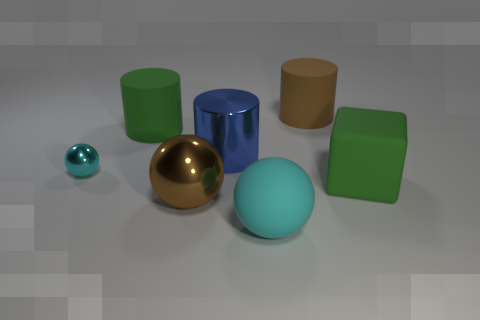

Top-3 Attended Words:
("many", "44.95%")
("?", "31.66%")
("there", "10.77%")
Image Attention Map: 

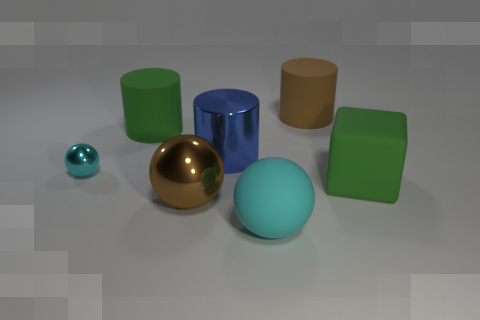

Top-3 Attended Words:
("many", "30.88%")
("object", "19.47%")
("are", "14.82%")
Image Attention Map: 

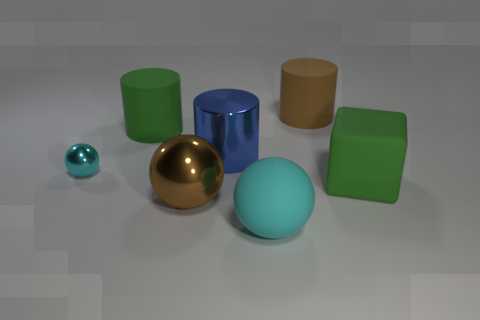

Top-3 Attended Words:
("many", "59.24%")
("how", "12.01%")
("object", "10.45%")
Image Attention Map: 

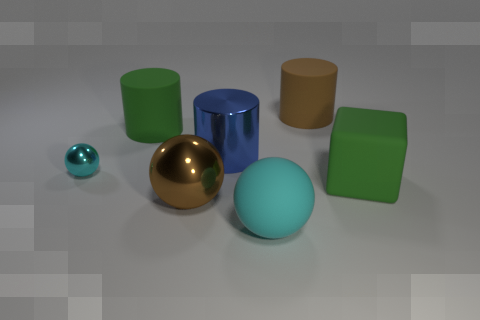

Top-3 Attended Words:
("?", "57.63%")
("many", "14.97%")
("are", "9.50%")
Image Attention Map: 

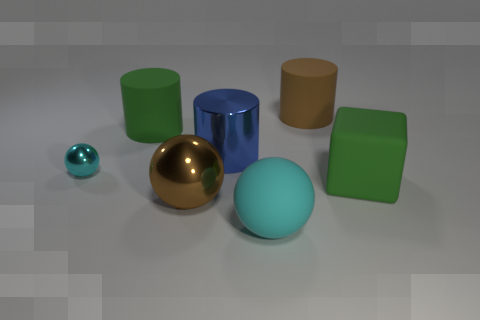

Top-3 Attended Words:
("many", "50.42%")
("?", "13.54%")
("how", "12.86%")
Image Attention Map: 

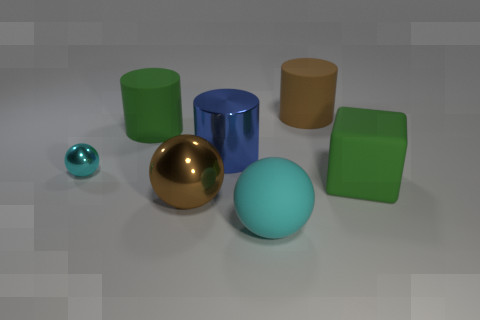

Top-3 Attended Words:
("many", "50.09%")
("?", "20.15%")
("how", "8.38%")
Image Attention Map: 

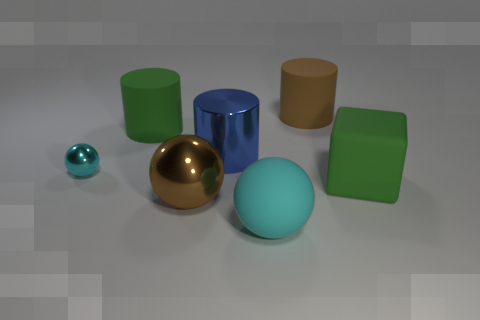

Top-3 Attended Words:
("object", "29.92%")
("?", "21.38%")
("how", "18.18%")
Image Attention Map: 

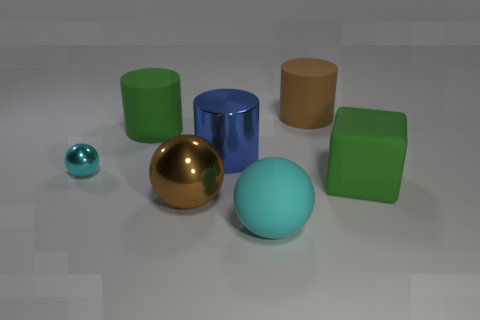

Top-3 Attended Words:
("object", "45.67%")
("how", "31.44%")
("many", "12.75%")
Image Attention Map: 

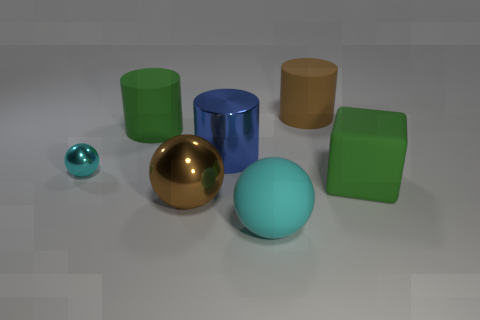

Top-3 Attended Words:
("object", "35.25%")
("how", "26.44%")
("?", "19.58%")
Image Attention Map: 

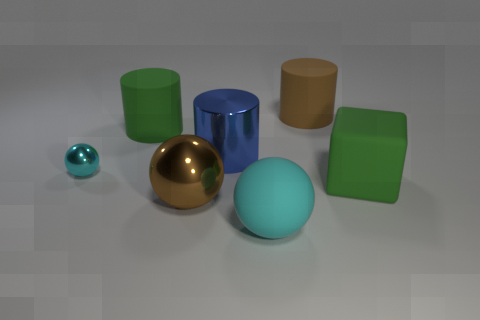

Top-3 Attended Words:
("object", "38.00%")
("how", "21.21%")
("many", "12.48%")
Image Attention Map: 

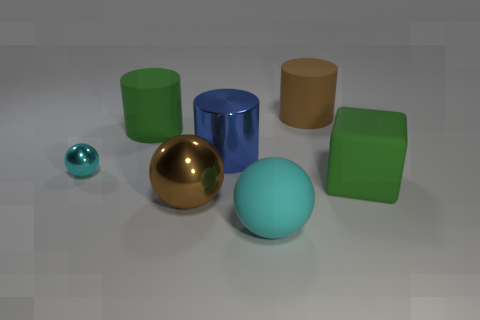

In [22]:
visualize(img,results;p=o[:p])